In [43]:
#importing pandas
import pandas as pd
import os

In [44]:
# reading in data
tweets = pd.read_csv('cleaned_tweet_df.csv')

In [45]:
# checking the dataframe
tweets

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,score,scoremap
0,2021-03-17 15:16:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @MoetiTshidi: Africa is in the midst of a f...,1.750000e-01,0.275000,en,323.0,0.0,DuncanSteele8,48.0,74.0,[],"[{'screen_name': 'MoetiTshidi', 'name': 'Dr Ma...",NaN,NaN,positive,1
1,2021-03-02 10:05:30+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @doritmi: At least one take away seems to m...,-3.000000e-01,0.400000,en,284.0,0.0,JonathanKuo11,19.0,103.0,[],"[{'screen_name': 'doritmi', 'name': '(((Dorit ...",NaN,NaN,negative,0
2,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411038] \nBSM-Deenanath Hosp Pvt PMC...,-7.500000e-01,1.000000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],NaN,NaN,negative,0
3,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411004] \nBMCC-DEENANATH HOSPITAL PV...,-7.500000e-01,1.000000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],NaN,NaN,negative,0
4,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411030] \nPoona Hospital PMC P\nVacc...,-7.500000e-01,1.000000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],NaN,NaN,negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,2021-02-26 06:48:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @RealJoelSmalley: Yet another amazingly qua...,5.551115e-17,0.900000,en,2056.0,0.0,TanyaRo58329998,68.0,24.0,[],"[{'screen_name': 'RealJoelSmalley', 'name': 'J...",NaN,NaN,positive,1
772,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411007] \nAundh Kuty Rugnalaya - PMC...,-7.500000e-01,1.000000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],NaN,NaN,negative,0
773,2021-05-31 14:03:19+00:00,"<a href=""https://help.twitter.com/en/using-twi...",Pin Code:[411041] \nMurlidhar Laigude - PMCG\n...,-7.500000e-01,1.000000,en,0.0,0.0,PuneUpdater,88.0,0.0,[],[],NaN,NaN,negative,0
774,2021-06-10 09:01:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I urge all the people of #India to take #Covid...,-1.666667e-01,0.833333,en,3.0,0.0,ishitarehagupta,4.0,16.0,"[{'text': 'India', 'indices': [25, 31]}, {'tex...",[],NaN,"Mumbai, India",negative,0


In [46]:
# assigning index of tweets from PuneUpdater to variable
drop_pune = tweets[tweets['original_author'] == 'PuneUpdater'].index

In [47]:
# dropping pune updater tweets
tweets.drop(drop_pune, inplace=True)

In [48]:
# checking what dataframe looks like now
tweets

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,score,scoremap
0,2021-03-17 15:16:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @MoetiTshidi: Africa is in the midst of a f...,1.750000e-01,0.275000,en,323.0,0.0,DuncanSteele8,48.0,74.0,[],"[{'screen_name': 'MoetiTshidi', 'name': 'Dr Ma...",NaN,NaN,positive,1
1,2021-03-02 10:05:30+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @doritmi: At least one take away seems to m...,-3.000000e-01,0.400000,en,284.0,0.0,JonathanKuo11,19.0,103.0,[],"[{'screen_name': 'doritmi', 'name': '(((Dorit ...",NaN,NaN,negative,0
6,2021-05-04 06:40:21+00:00,"<a href=""http://twitter.com/download/android"" ...",#Vaccines4Nepal #COVID19 #VaccinEquity Please ...,-6.000000e-01,1.000000,en,1010.0,0.0,MajDowney,38.0,93.0,"[{'text': 'Vaccines4Nepal', 'indices': [0, 15]...",[],NaN,NaN,negative,0
7,2021-06-18 14:03:30+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @HealthZA: 18 June 2022 latest number of #C...,5.000000e-01,0.900000,en,1.0,0.0,ZamaniSteven,5.0,33.0,"[{'text': 'COVID19', 'indices': [44, 52]}, {'t...","[{'screen_name': 'HealthZA', 'name': 'Departme...",NaN,NaN,positive,1
8,2021-06-01 14:23:34+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @RealJoelSmalley: Yet another amazingly qua...,5.551115e-17,0.900000,en,803.0,0.0,DyingtoL,141.0,340.0,[],"[{'screen_name': 'RealJoelSmalley', 'name': 'J...",NaN,around,positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,2021-05-08 07:41:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @eNCA: Basic Education Minister Angie Motsh...,-5.000000e-02,0.262500,en,75.0,0.0,carolinereynol3,1.0,19.0,[],"[{'screen_name': 'eNCA', 'name': 'eNCA', 'id':...",NaN,NaN,negative,0
769,2021-03-04 21:01:22+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",The Truth Behind COVID-19 Vaccines (6) —— Bell...,-3.861111e-01,0.622222,en,538.0,0.0,edendomain,2021.0,154.0,"[{'text': 'DrLiMengYan', 'indices': [101, 113]}]",[],NaN,新西兰奥克兰伊甸农场,negative,0
771,2021-02-26 06:48:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @RealJoelSmalley: Yet another amazingly qua...,5.551115e-17,0.900000,en,2056.0,0.0,TanyaRo58329998,68.0,24.0,[],"[{'screen_name': 'RealJoelSmalley', 'name': 'J...",NaN,NaN,positive,1
774,2021-06-10 09:01:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I urge all the people of #India to take #Covid...,-1.666667e-01,0.833333,en,3.0,0.0,ishitarehagupta,4.0,16.0,"[{'text': 'India', 'indices': [25, 31]}, {'tex...",[],NaN,"Mumbai, India",negative,0


### Cleaning Text

In [49]:
# Function to clean text
class TextDataCleaning:
    """
    This function will efficiently clean text data.
    """
    def __init__(self, lst):
        
        self.lst = lst
        
    def clean_html(self, lst:list):
        
        from html.parser import HTMLParser
        out = []
        
        for text in lst:
            text=HTMLParser().unescape(text)
            out.append(text)
        
        return out
    
    def text_encode_decode(self, lst):
        
        out = []
        for text in lst:
            
            #Encode from UTF-8 to ascii
            encode_text =text.encode('ascii','ignore')

            #decode from ascii to UTF-8
            decode_text=encode_text.decode(encoding='UTF-8')
            
            out.append(text)
            
        return out
    
    def remove_url_hashtag_style(self, lst):
        
        out = []
        #library for regular expressions
        import re
        
        for text in lst:
            
            # remove hyperlinks
            text = re.sub(r'https?:\/\/.\S+', "", text)
            
            # remove hashtags
            # only removing the hash # sign from the word
            text = re.sub(r'#', '', text)
            
            # remove old style retweet text "RT"
            text = re.sub(r'^RT[\s]+', '', text)
            
            out.append(text)
            
        return out
    
    def contraction_removal(self, lst):
        
        out = []

        #dictionary consisting of the contraction and the actual value
        Apos_dict={"'s":" is","n't":" not","'m":" am","'ll":" will",
                   "'d":" would","'ve":" have","'re":" are"}

        for text in lst:
            
            #replace the contractions
            for key,value in Apos_dict.items():
                if key in text:
                    text=text.replace(key,value)
            out.append(text)
                    
        return out
    
    def split_attached_words(self, lst):
        
        out = []
        
        import re
        #separate the words
        for text in lst:
            
            text = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",text) if s])
            out.append(text)
            
        return out
    
    def convert_to_lower(self, lst):
        
        out = []
        
        for text in lst:
            
            #convert to lower case
            text=text.lower()
            out.append(text)
        
        return out
    
    def slang_lookup(self, lst):
        
        out = []
        
        #open the fle slang.txt
        file=open("slang.txt","r")
        slang=file.read()

        #separating each line present in the file
        slang=slang.split('\n')

        for text in lst:
            
            tweet_tokens=text.split()
            slang_word=[]
            meaning=[]

            #store the slang words and meanings in different lists
            for line in slang:
                temp=line.split("=")
                slang_word.append(temp[0])
                meaning.append(temp[-1])

            #replace the slang word with meaning
            for i,word in enumerate(tweet_tokens):
                if word in slang_word:
                    idx=slang_word.index(word)
                    tweet_tokens[i]=meaning[idx]

            text=" ".join(tweet_tokens)
            out.append(text)
            
        return out
#     def standerdize_spellcheck(self, lst):
#         out = []
#         import itertools
        
#         for text in lst:
            
#             #One letter in a word should not be present more than twice in continuation
#             text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))

#             from autocorrect import Speller
#             spell = Speller(lang='en')
#             #spell check
#             text=spell(text)
#             out.append(text)
#         return out
    def use_all(self):
        one = self.clean_html(self.lst)
#         print(len(one))
        two = self.text_encode_decode(one)
#         print(len(two))
        three = self.remove_url_hashtag_style(two)
#         print(len(three))
        four = self.contraction_removal(three)
#         print(len(four))
        five = self.split_attached_words(four)
#         print(len(five))
        six = self.convert_to_lower(five)
#         print(len(six))
        seven =self.slang_lookup(six)
#         print(len(seven))
#         eight = self.standerdize_spellcheck(seven)
#         print(len(eight))
        return seven
#     def remove_stopwords(self, lst):
#         out = []
        
#         import nltk
#         #download the stopwords from nltk using
#         nltk.download('stopwords')
#         #import stopwords
#         from nltk.corpus import stopwords

#         #import english stopwords list from nltk
#         stopwords_eng = stopwords.words('english')

#         tweet_tokens=tweet.split()
#         tweet_list=[]
#         #remove stopwords
#         for word in tweet_tokens:
#             if word not in stopwords_eng:
#                 tweet_list.append(word)

#         print("tweet_list = {}".format(tweet_list))



In [50]:
# creating new column containing cleaned tweet texts
tweets['cleaned_text'] = TextDataCleaning(tweets['original_text']).use_all()

In [51]:
# Removing punctuation
import re
tweets['cleaned_text'] = tweets['cleaned_text'].map(lambda x: re.sub('[,\.!?]', '', x))

In [52]:
# Removing @
tweets['cleaned_text'] = tweets['cleaned_text'].map(lambda x: re.sub('@[ ]*', '', x))

In [53]:
# Checking what the cleaned_text column looks like 
tweets.cleaned_text

0      moeti tshidi: africa is in the midst of a full...
1      doritmi: at least one take away seems to me to...
6      vaccines4 nepal covid19 vaccin equity please 🙏...
7      health za: 18 june 2022 latest number of covid...
8      real joel smalley: yet another amazingly quali...
                             ...                        
768    enca: basic education minister angie motshekga...
769    the truth behind covid-19 vaccines (6) —— bell...
771    real joel smalley: yet another amazingly quali...
774    i urge all the people of india to take covid19...
775    edendomain: the truth behind covid-19 vaccines...
Name: cleaned_text, Length: 246, dtype: object

### Exploratory Analysis

In [54]:
# Importing the wordcloud library
from wordcloud import WordCloud

In [55]:
# Joining the different processed titles together.
long_string = ','.join(list(tweets['cleaned_text'].values))

In [56]:
# Creating a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [57]:
# Generating a word cloud
wordcloud.generate(long_string)

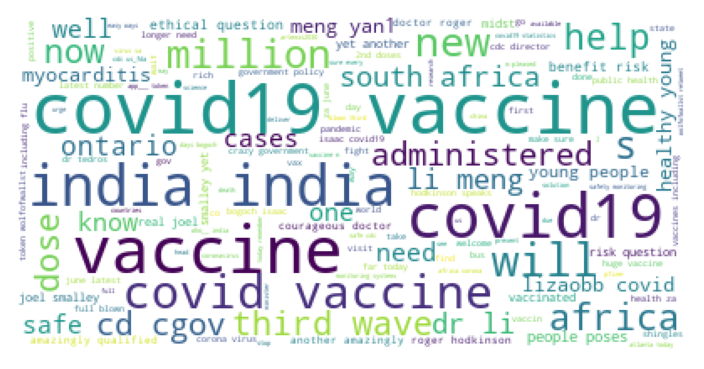

In [58]:
# Opening a plot of the generated image.
import matplotlib.pyplot as plt
plt.figure(figsize = (5,3), dpi = 173)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Preparing text for LDA Analysis

In [59]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [60]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [61]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [62]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

In [63]:
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(tweets['cleaned_text'] )

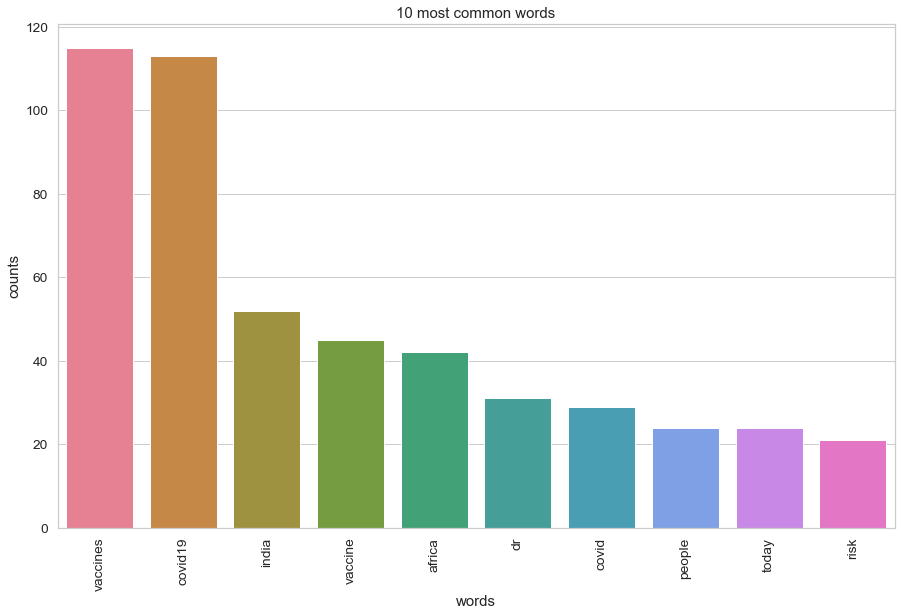

In [64]:
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

### Tokenizing The Text and Removing Stopwords

In [65]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = tweets.cleaned_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['moeti', 'tshidi', 'africa', 'midst', 'full', 'blown', 'third', 'wave', 'sobering', 'trajectory', 'surging', 'cases', 'rouse', 'everyone', 'urg']


### Converting The Tokenized Object Into A Corpus And Dictionary

In [66]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


### LDA model training

In [67]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.054*"covid" + 0.034*"vaccines" + 0.029*"risk" + 0.029*"question" + '
  '0.016*"people" + 0.015*"healthy" + 0.015*"poses" + 0.015*"lizaobb" + '
  '0.015*"young" + 0.015*"benefit"'),
 (1,
  '0.041*"covid" + 0.036*"vaccines" + 0.019*"vaccine" + 0.016*"days" + '
  '0.016*"today" + 0.016*"nd" + 0.013*"ontario" + 0.013*"huge" + 0.013*"isaac" '
  '+ 0.013*"doses"'),
 (2,
  '0.044*"vaccines" + 0.031*"covid" + 0.020*"safe" + 0.018*"vaccine" + '
  '0.017*"africa" + 0.014*"cd" + 0.012*"cgov" + 0.011*"dr" + 0.011*"every" + '
  '0.011*"cdc"'),
 (3,
  '0.023*"covid" + 0.022*"vaccines" + 0.011*"dr" + 0.009*"yan" + '
  '0.009*"syndrome" + 0.009*"bell" + 0.009*"palsy" + 0.009*"barre" + '
  '0.009*"cow" + 0.009*"guillain"'),
 (4,
  '0.047*"covid" + 0.032*"vaccines" + 0.016*"vaccine" + 0.013*"get" + '
  '0.012*"people" + 0.012*"vax" + 0.010*"need" + 0.010*"dr" + 0.009*"dirty" + '
  '0.007*"visit"'),
 (5,
  '0.023*"doctor" + 0.020*"hodkinson" + 0.020*"yet" + 0.020*"courageous" + '
  '0.020*"joel

### Analyzing LDA model results

In [68]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if True:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.033087  0.095114       1        1  17.354824
0     -0.137528 -0.003163       2        1  15.952096
2     -0.018953  0.072709       3        1  13.535752
6     -0.081048  0.033728       4        1  13.492252
7      0.082068  0.083848       5        1   9.370014
1      0.045064  0.042166       6        1   9.066411
5     -0.115084 -0.171664       7        1   8.658082
8      0.152868 -0.097084       8        1   5.962795
3      0.016871  0.026803       9        1   4.141811
9      0.088829 -0.082456      10        1   2.465962, topic_info=           Term       Freq      Total Category  logprob  loglift
672       india  29.000000  29.000000  Default  30.0000  30.0000
266    question  16.000000  16.000000  Default  29.0000  29.0000
267        risk  17.000000  17.000000  Default  28.0000  28.0000
375        help   9.000000   9.000000  Default  27.0000  27.0000
53       doctor   7.000000   7.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
23          may   0.406190   4.263130  Topic10  -5.2801   1.3517
290         big   0.406187   2.663132  Topic10  -5.2801   1.8221
519  vaccinated   0.406182   7.455394  Topic10  -5.2801   0.7927
385        wise   0.406182   2.613026  Topic10  -5.2801   1.8411
294        news   0.406181   7.459106  Topic10  -5.2802   0.7922

[535 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
868       8  0.750398       account
476       5  0.650452      adelaide
133       2  0.191824  administered
133       3  0.191824  administered
133       4  0.095912  administered
...     ...       ...           ...
269       6  0.105495         young
269       7  0.105495         young
48        2  0.729820            za
48        7  0.182455            za
760       6  0.674242     zerowield

[771 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 7, 8, 2, 6, 9, 4, 10])

### Sentiment Analysis (Model Building)

In [69]:
# importing necessary modules
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [70]:
# setting feature
X = tweets['cleaned_text'].values

In [71]:
# setting target
y = tweets['scoremap'].values

In [72]:
# splittng dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(184,)
(62,)
(184,)
(62,)


In [73]:
# initializing vectorizer
trigram_vectorizer = CountVectorizer(ngram_range=(3,3))

In [74]:
# fitting and transforming train set
trigram_train = trigram_vectorizer.fit_transform(X_train)

In [75]:
# transforming the test set
trigram_test = trigram_vectorizer.transform(X_test)

In [76]:
# initializing classifier
sgdc = SGDClassifier()

In [77]:
# fitting on the model
sgdc.fit(trigram_train,y_train)

SGDClassifier()

In [78]:
# predicting on transformed test set
y_pred=sgdc.predict(trigram_test)

### Model Evaluation

In [79]:
# accuracy score
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 91.94%


In [80]:
# precision score
score=precision_score(y_test,y_pred)
print(f'Precision_Score: {round(score*100,2)}%')

Precision_Score: 94.12%


In [81]:
# recall score
score=recall_score(y_test,y_pred)
print(f'Recall_Score: {round(score*100,2)}%')

Recall_Score: 96.0%


In [82]:
# f1 score
score=f1_score(y_test,y_pred)
print(f'F1_Score: {round(score*100,2)}%')

F1_Score: 95.05%
